In [54]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. But using the collected data about abalone (with various attributes) we can predict the age of the abalone. We have been given a dataset of abalone which contains the following attributes : 
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings 

In [55]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Loaded the dataset and checked the first five rows of data

# Data Processing

In [56]:
df.shape

(4177, 9)

checked the number of rows

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


sex column has string attribute, rest all are number

In [58]:
df.isnull().sum() # chekcing null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no null values in the dataset

In [59]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

# Exploratory Data Analysis

<AxesSubplot:ylabel='Count'>

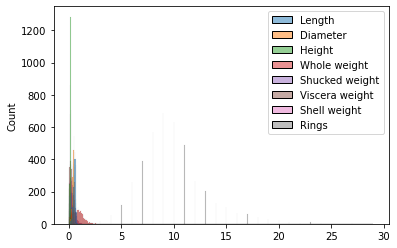

In [60]:
sns.histplot(df)

In [61]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


After histplot and describe we found that the data is acceptable range , and the Height column has 0 value

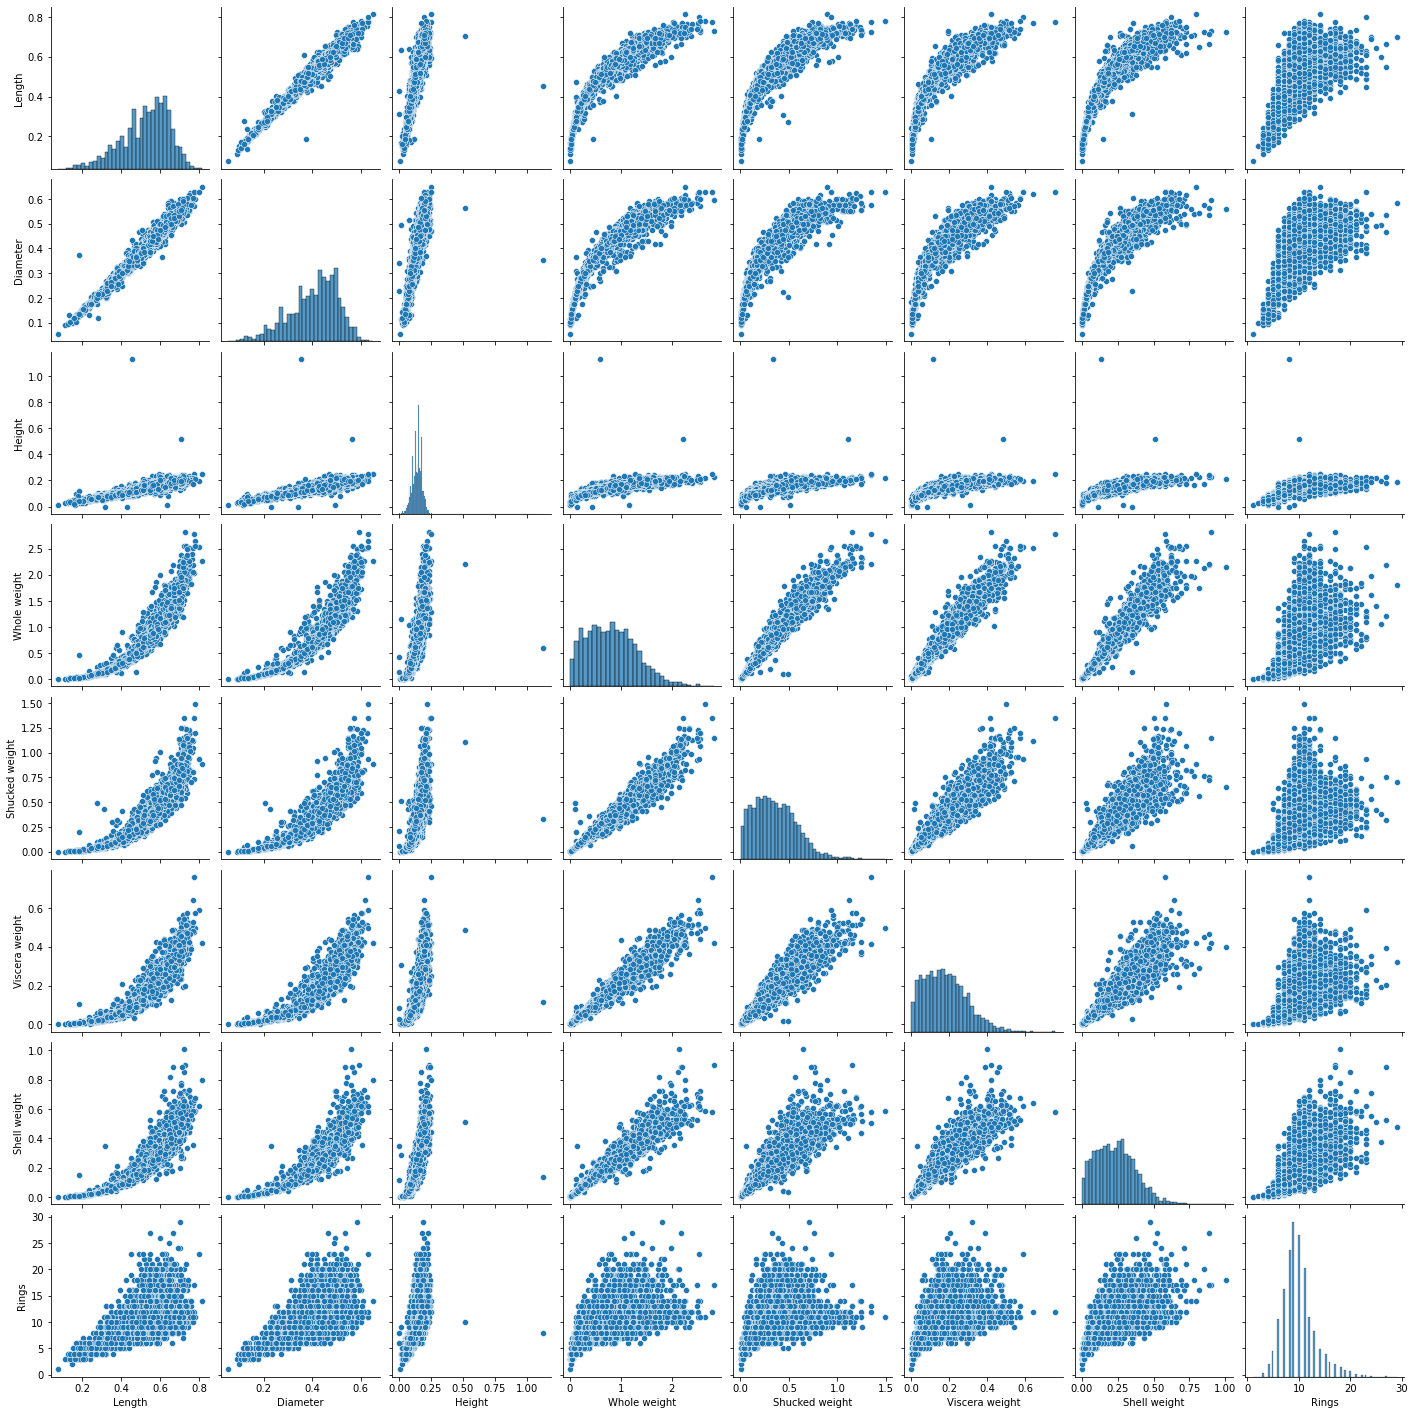

In [62]:
sns.pairplot(df)

From the pairplot we came to know that there are corellation within the features

<AxesSubplot:xlabel='Height', ylabel='Rings'>

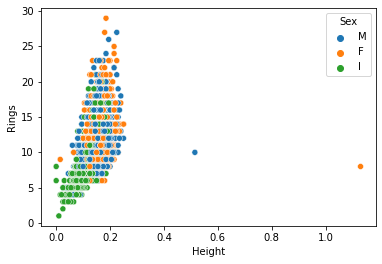

In [64]:
sns.scatterplot(data=df, x="Height", y="Rings",hue='Sex')

Infant abalone has less rings and female abalone has maximum Rings. There is positive correlation between Height and Rings

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

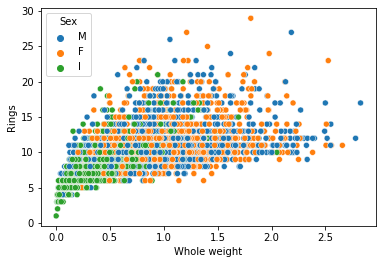

In [66]:
sns.scatterplot(data=df, x="Whole weight", y="Rings",hue='Sex')

There is not much correlation between whole weight and rings


<AxesSubplot:xlabel='Length', ylabel='Whole weight'>

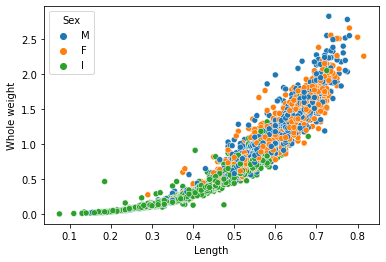

In [67]:
sns.scatterplot(data=df, x="Length", y="Whole weight",hue='Sex')

The more lenght of abalone the whole weight will be more

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

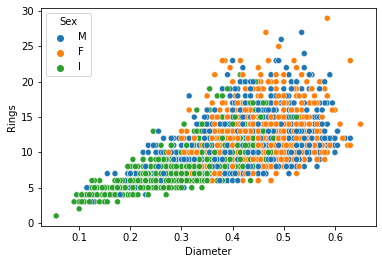

In [69]:
sns.scatterplot(data=df, x="Diameter", y="Rings",hue='Sex')

The more Diameter the Rings will be more

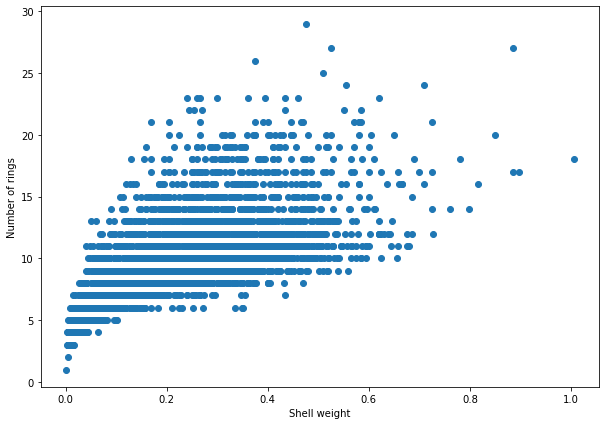

In [154]:
#Checking the relation between Height and rings column with scatter plot.
plt.figure(figsize=(10,7))
plt.scatter(df["Shell weight"],df["Rings"])
plt.xlabel("Shell weight")
plt.ylabel("Number of rings")
plt.show()

THe more shell weight the nore the rings

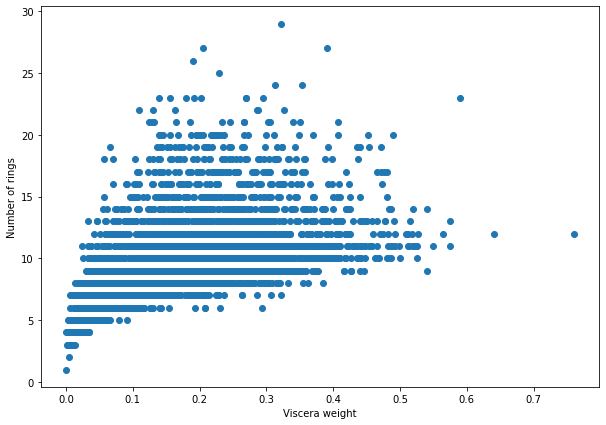

In [157]:
#Checking the relation between Height and rings column with scatter plot.
plt.figure(figsize=(10,7))
plt.scatter(df["Viscera weight"],df["Rings"])
plt.xlabel("Viscera weight")
plt.ylabel("Number of rings")
plt.show()



The more the Viscera weight the more the number of rings

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Feature Engineering

In [76]:
for label in "MFI":
    df[label]=df['Sex']== label

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,True,False,False
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,True,False,False
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,True,False
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,True,False,False
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,False,True


There are three categories is sex "M","F" and "I" in sex , there is 
suitable for regression algotrthms , so we create binary/boolean feature 
for each of the 3 Option


We created the boolean for each option of Sex, so we can drop the Sex column

In [77]:
del df['Sex']

Deleted the Sex Column

In [78]:
from sklearn import preprocessing
enc=preprocessing.LabelEncoder()
df['M']=enc.fit_transform(df['M'])
df['F']=enc.fit_transform(df['F'])
df['I']=enc.fit_transform(df['I'])

In [ ]:
Converted the boolean values into integer values

In [79]:
df.head(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,1,0,0


Checked the dataset after encoding

Length               AxesSubplot(0.125,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Viscera weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Shell weight            AxesSubplot(0.125,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.257857,0.125;0.110714x0.343182)
M                    AxesSubplot(0.390714,0.125;0.110714x0.343182)
F                    AxesSubplot(0.523571,0.125;0.110714x0.343182)
I                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

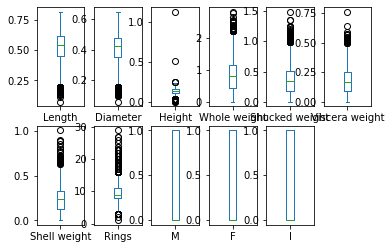

In [80]:
df.plot(kind='box',subplots=True,layout=(2,6))

Using boxplot we came to know that there are outliers

In [81]:
z = np.abs(zscore(df))

z.shape



(4177, 11)

In [82]:
threshold = 3
print(np.where(z>3))    # checking the data available more thanz score 3

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [83]:
df_new = df[(z<3).all(axis=1)]  # removing the outliers havning z score more than 3
print(df.shape)
print(df_new.shape)



(4177, 11)
(4027, 11)


Removed the outliers from datset which are out of 3 Z score

In [89]:
loss =(4177-4027)/4177*100 # checking the loss percentage
print(loss)

3.5910940866650707


After removing the outliers we found that the loss of data is 3.5 %, which is acceptable

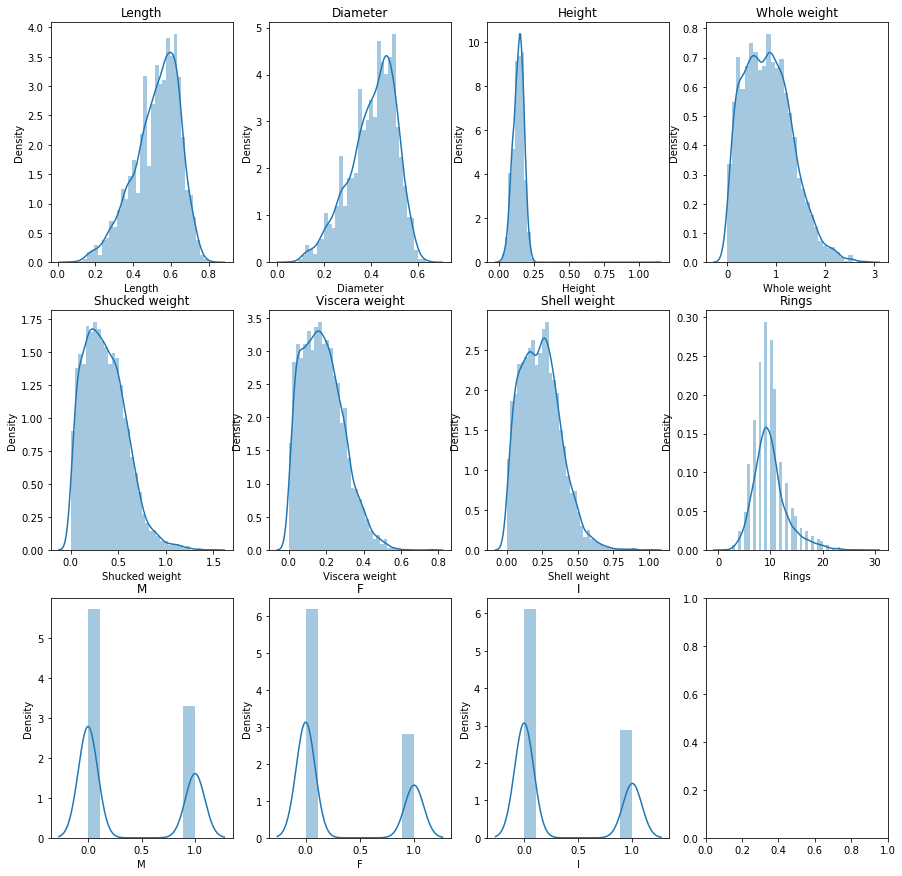

In [85]:
fig, axes = plt.subplots(nrows = 3, ncols = 4)    # axes is 2d array (3x4)
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, df.columns):
    sns.distplot(df[col], ax = ax)
    ax.set_title(col)

There is high skewness in Height

In [86]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
M                 0.557390
F                 0.807302
I                 0.765708
dtype: float64

There is skewness in height

In [87]:
from scipy.stats import boxcox
df['Height']=boxcox(df['Height'],0)

ValueError: Data must be positive.

There is negetive or zero value in Height so boxcox will not work


In [90]:
from sklearn.preprocessing import PowerTransformer
cols=df[['Height']]
pt=PowerTransformer(method='yeo-johnson',standardize=True)
yeojohn=pt.fit(cols)
yeojohn=pt.transform(cols)
df['Height']=pd.DataFrame(data=yeojohn,columns=['Height'])

In [96]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            0.409563
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
M                 0.557390
F                 0.807302
I                 0.765708
dtype: float64

after removing the skewness found satisfactory

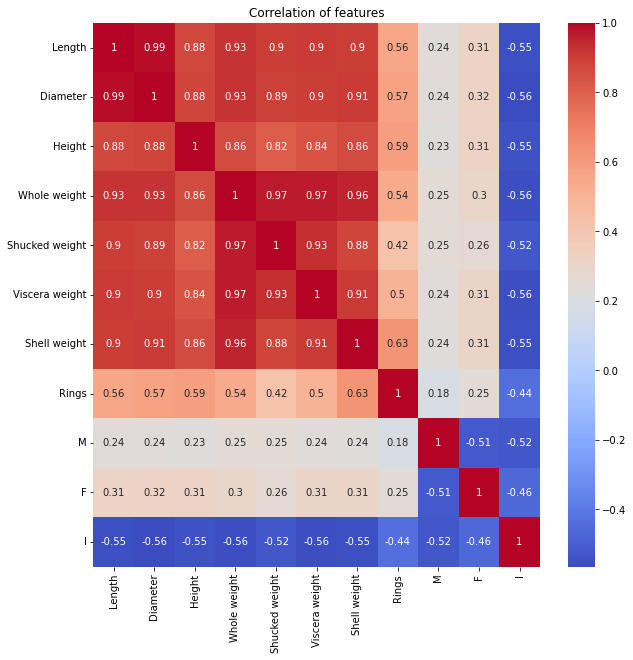

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),color='Blue',annot=True,cmap='coolwarm')
plt.title('Correlation of features')
plt.show()

The Rings has positive correlation with almost every attributes, the maximum correlation is with Shell Weight.
There is multicorrelation available with in the features

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop('Rings',axis=1)
x.shape

(4177, 10)

imported the VIF , removed the target from features

In [99]:
y=df['Rings']
y.shape

(4177,)

In [100]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)

Defined the vif calculation function 

In [101]:
vif_calc()

   VIF Factor        Features
0   41.002296          Length
1   42.664101        Diameter
2    5.088745          Height
3  109.787638    Whole weight
4   28.587628  Shucked weight
5   17.465854  Viscera weight
6   21.390180    Shell weight
7   39.550194               M
8   34.640704               F
9   32.986182               I


after calling the VIF function we found, 
(i) We can drop either of Length or Diameter 
(ii) We can drop either of Shucked Weight and Shell Weight

In [102]:
df.drop(['Length','Shucked weight'],axis=1, inplace=True)

Dropped the unwanted columns

In [124]:
df.head(3)

,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings,M,F,I
0,0.365,-1.114457,0.5140,0.1010,0.15,15,1,0,0
1,0.265,-1.242040,0.2255,0.0485,0.07,7,1,0,0
2,0.420,-0.106960,0.6770,0.1415,0.21,9,0,1,0


In [105]:
x=df.drop('Rings',axis=1)

In [106]:
x.shape

(4177, 8)

In [107]:
y=df['Rings']
y.shape

(4177,)

Prepard the x features and the Target y

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Choosing the best random state for our ML Model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
print(f"Best training accuracy is :{r2_score(y_train,pred_train)}, at random state : {i}")
print(f"Best test accuracy is :{r2_score(y_test,pred_test)}, at random state : {i}")



Best training accuracy is :0.4820941193444236, at random state : 99
Best test accuracy is :0.45751140077356656, at random state : 99


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.45,random_state=99)

we splitted the dataset into training and test set

# Applying Regression Model

In [129]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Accuracy score of Linear Regression :",r2_score(y_test,pred_test))

Accuracy score of Linear Regression : 0.46882552366191255


using the Linear Regression model we foudnt he accuracy is 46%

In [115]:
# cross validation

from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()

print("Cross validation of the model is ",cv_mean)

Cross validation of the model is  0.35807793495748885


Found the cross validation score 35%

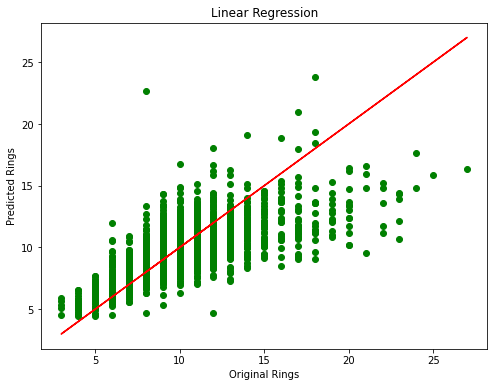

In [116]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Original Rings')
plt.ylabel('Predicted Rings')
plt.title('Linear Regression')
plt.show()

The regression line fit to model is depicted above

In [117]:
from sklearn.svm import SVR
kernelist=['linear','poly','rbf']
for i in kernelist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.41614492031239847
0.41955189212978383
0.40234611014533306


found the Linear Kernel is giving maximum output

In [128]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
pred_train=svr.predict(x_train)
pred_test=svr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print("Accuracy score of training for SVM :",train_score)
print("Accuracy score of test for SVM :",test_score)
print("Accuracy Score for Random Forest Regressor : ",r2_score(y_test,pred_test))



Accuracy score of training for SVM : 0.41614492031239847
Accuracy score of test for SVM : 0.38378236303433955
Accuracy Score for Random Forest Regressor :  0.38378236303433955


Found the accuracy of SVM is 38%

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of DT is ', train_score)
print('The test accuracy of the DT is ',test_score)

The performance of DTC is very poor

In [126]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of RF is ', train_score)
print('The test accuracy of the RF is ',test_score)
print("Accuracy Score for Random Forest Regressor : ",r2_score(y_test,pred_test))



The training accuracy of RF is  0.9247199272032114
The test accuracy of the RF is  0.48037087112723265
Accuracy Score for Random Forest Regressor :  0.48037087112723265


The RF regression has 48% accuracy

Cross Validation


In [125]:
# cross validation
model=(lr,rf,dt,svr)
from sklearn.model_selection import cross_val_score
for m in model:
    cv_score=cross_val_score(m,x,y,cv=5)
    cv_mean=cv_score.mean()
    print("Cross validation of the model is ",cv_mean)

Cross validation of the model is  0.35807793495748885
Cross validation of the model is  0.36573415561464573
Cross validation of the model is  -0.21203693902557164
Cross validation of the model is  0.359454583988439


SVR model has best cross validation value

# Hypertunig of parameters

In [141]:
from sklearn.model_selection import GridSearchCV
parameters={"C":[.0001,.001,.01,.1,1,10],"kernel":["rbf","linear"]}
GCV=GridSearchCV(SVR(),parameters,cv=5)
GCV.fit(x_train,y_train)
print("Best parameters for tuning the model are : ",GCV.best_params_)

Best parameters for tuning the model are :  {'C': 10, 'kernel': 'rbf'}


Found the best parameters for the best model that is SVR

In [142]:
#putting the best parameters in the selected model

mod=SVR(C=10,kernel="rbf")

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print("Final Accuracy Score after tuning : ",r2_score(y_test,pred)*100)



Final Accuracy Score after tuning :  45.25629993925694


# Saving the best model

In [143]:
#importing the necessary library
import joblib
joblib.dump(mod,"Abalone Data Analysis.pkl")



['Abalone Data Analysis.pkl']

In [144]:
#Checking the model is working or not
model=joblib.load("Abalone Data Analysis.pkl")
prediction=model.predict(x_test)
print("Accuracy Score : ",r2_score(y_test,prediction))



Accuracy Score :  0.4525629993925694


In [145]:
#Converting the prediction into dataframe
prediction=pd.DataFrame(prediction)



In [147]:
#Saving the prediction
prediction.to_csv("Abalone.csv")